# CODE TO EXECUTE THE REPORT ANALYSIS

### GROUP B : Floberg, Gnoato, Salvagnin, Stecca

### MARKET SECTOR: Healthcare

## POINT 1

These first cells are used to import all the tools we need to perform the following codes, such as numpy and pandas operators, or statistical instruments. The last two commands are just used to refer to the directory contaning the excel files to extract data.

In [2]:
#importing packages and link to the directory
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import seaborn as sns
import statsmodels.api as sm
import os
cwd=os.getcwd()
os.chdir("C:/Users/Asus/Desktop/RTSM PROJECT")

We proceed with the construction by creating the dataframes containing the data from equities, market and interest rate. Next, we create an array with values for market and interest rate that are going to be recalled through all the code.

In [3]:
#running the excel files
data = pd.read_excel('23_equities.xlsx', 'Foglio1', index_col =None,na_values =['NA '])
MARKET=pd.read_excel('MERCATO.xlsx', 'Foglio1', index_col =None,na_values =['NA '])
RISKFREE = pd.read_excel('interest_rate_DEU.xlsx', 'Foglio1', index_col =None,na_values =['NA '])


In [4]:
#creating arrays with market and interest values
MKT=MARKET[[ 'STOXX EUROPE 600 HEALTH CARE E - TOT RETURN IND']]
RFREE = RISKFREE[['BD DISCOUNT RATE / SHORT TERM EURO REPO RATE NADJ']]



The following lines contain the computation of the excess returns for the market, with the appropriate logarithmic transformation to visualise them better. The 100 factor multiplied to them is to have a percentage representation of the returns.
Then we create the vector rMKTe where we subtract the short-term interest rate.

In [5]:
#market and risk free parameters for plotting
rMKT = 100 *(np.log(MKT)-np.log(MKT.shift(1)))
rF=RFREE/12
rMKT=np.array(rMKT)
rF=np.array(rF)
t=pd.date_range(start='01/01/2001',end='11/01/2023', freq='M')
rMKTe=np.subtract(rMKT,rF)


In the following lines we define a function performing the regression for the models, which we'll be used in point 2 and 3. 
The exclusion of the first rows for the variables is to exclude the presence of None values that could alter the estimation.

In [6]:
def run_regression(x,y):
    # Create a column stack with a column of ones and rMKTe
    X = np.column_stack((np.ones_like(x[1:]), x[1:]))

    # Exclude the first row because it might contain None values
    Res = sm.OLS(y[1:], X).fit()

    # Print the summary
    print(Res.summary())

## POINT 2 

Here we perform the regression for each equity in the sample, obtaining an approximation with a linear model. 
In order to have a shorter code, we make use of a for loop. To build that, the first three lines of coding ebstract each name of the equities in our sample to create a list with them; then, we iterate the for loop on this list.
For each name in the list "cleaned_company_names" we extract the array with data, performing the same transformations we did for the market vector, in order to compute excess returns to an appropriate interest rate. Afterwards, the loop returns a scatter plot with the excess returns for each equity compared to the market excess returns, where we can firstly observe if a linear shape appears or not. Finally, the function "run_regression" defined above is called to perform the OLS estimation, and we observe the parameters for the model for each company.

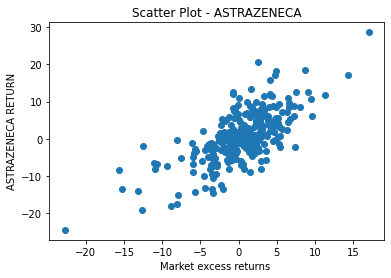

Regression summary for ASTRAZENECA:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     261.8
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           1.15e-41
Time:                        02:31:37   Log-Likelihood:                -825.36
No. Observations:                 273   AIC:                             1655.
Df Residuals:                     271   BIC:                             1662.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0

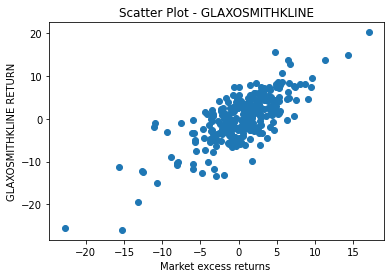

Regression summary for GLAXOSMITHKLINE:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     384.2
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           7.07e-54
Time:                        02:31:37   Log-Likelihood:                -751.88
No. Observations:                 273   AIC:                             1508.
Df Residuals:                     271   BIC:                             1515.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

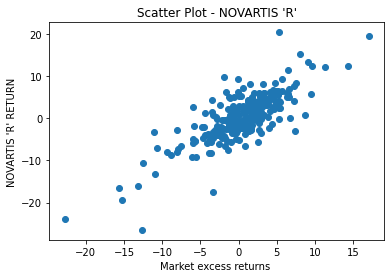

Regression summary for NOVARTIS 'R':
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     468.4
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           5.20e-61
Time:                        02:31:37   Log-Likelihood:                -724.86
No. Observations:                 273   AIC:                             1454.
Df Residuals:                     271   BIC:                             1461.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -

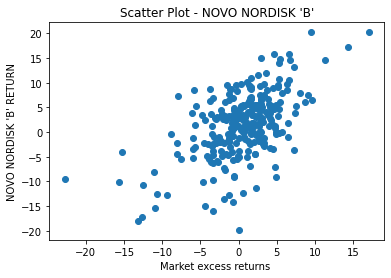

Regression summary for NOVO NORDISK 'B':
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     126.7
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           2.29e-24
Time:                        02:31:38   Log-Likelihood:                -848.87
No. Observations:                 273   AIC:                             1702.
Df Residuals:                     271   BIC:                             1709.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      

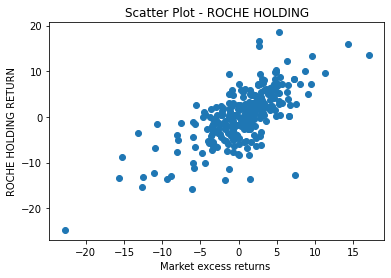

Regression summary for ROCHE HOLDING:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     253.3
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           1.01e-40
Time:                        02:31:38   Log-Likelihood:                -782.15
No. Observations:                 273   AIC:                             1568.
Df Residuals:                     271   BIC:                             1576.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         

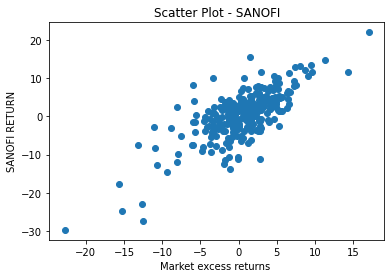

Regression summary for SANOFI:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     330.7
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           7.46e-49
Time:                        02:31:39   Log-Likelihood:                -787.98
No. Observations:                 273   AIC:                             1580.
Df Residuals:                     271   BIC:                             1587.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0823

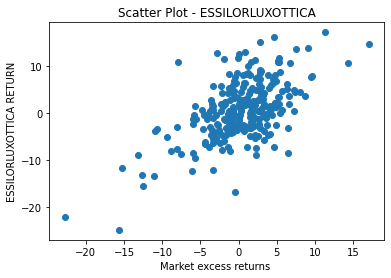

Regression summary for ESSILORLUXOTTICA:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     146.3
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           3.23e-27
Time:                        02:31:39   Log-Likelihood:                -823.75
No. Observations:                 273   AIC:                             1652.
Df Residuals:                     271   BIC:                             1659.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      

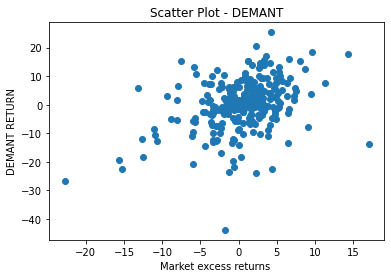

Regression summary for DEMANT:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     46.17
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           6.86e-11
Time:                        02:31:39   Log-Likelihood:                -962.73
No. Observations:                 273   AIC:                             1929.
Df Residuals:                     271   BIC:                             1937.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0802

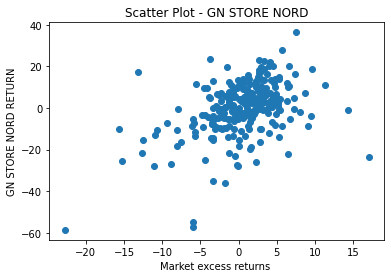

Regression summary for GN STORE NORD:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     64.39
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           3.11e-14
Time:                        02:31:40   Log-Likelihood:                -1051.2
No. Observations:                 273   AIC:                             2106.
Df Residuals:                     271   BIC:                             2114.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         

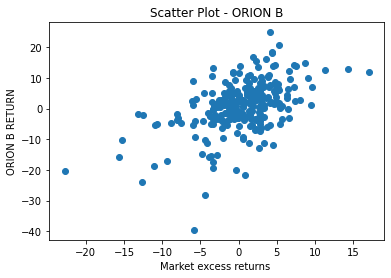

Regression summary for ORION B:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     93.10
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           3.97e-19
Time:                        02:31:40   Log-Likelihood:                -917.38
No. Observations:                 273   AIC:                             1839.
Df Residuals:                     271   BIC:                             1846.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.537

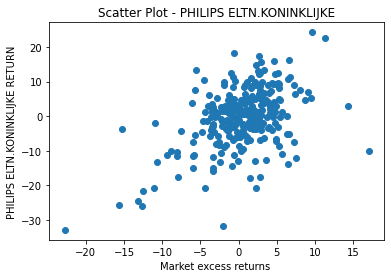

Regression summary for PHILIPS ELTN.KONINKLIJKE:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     80.51
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           4.93e-17
Time:                        02:31:41   Log-Likelihood:                -938.57
No. Observations:                 273   AIC:                             1881.
Df Residuals:                     271   BIC:                             1888.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
con

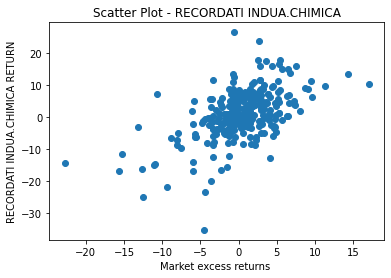

Regression summary for RECORDATI INDUA.CHIMICA:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     124.8
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           4.42e-24
Time:                        02:31:41   Log-Likelihood:                -898.42
No. Observations:                 273   AIC:                             1801.
Df Residuals:                     271   BIC:                             1808.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cons

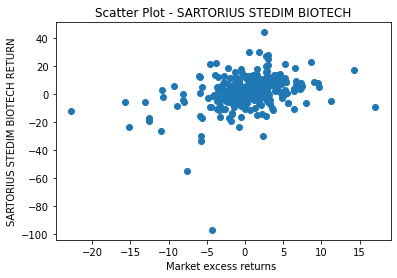

Regression summary for SARTORIUS STEDIM BIOTECH:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     35.14
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           9.31e-09
Time:                        02:31:41   Log-Likelihood:                -1059.4
No. Observations:                 273   AIC:                             2123.
Df Residuals:                     271   BIC:                             2130.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
con

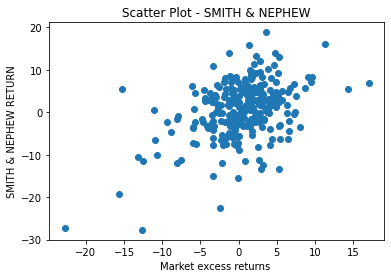

Regression summary for SMITH & NEPHEW:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     63.26
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           4.94e-14
Time:                        02:31:42   Log-Likelihood:                -870.26
No. Observations:                 273   AIC:                             1745.
Df Residuals:                     271   BIC:                             1752.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        

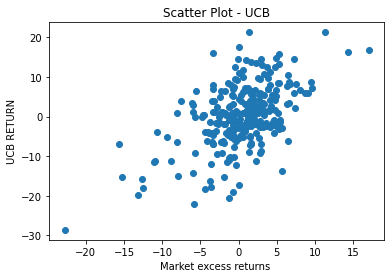

Regression summary for UCB:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     111.5
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           4.66e-22
Time:                        02:31:42   Log-Likelihood:                -902.73
No. Observations:                 273   AIC:                             1809.
Df Residuals:                     271   BIC:                             1817.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1210   

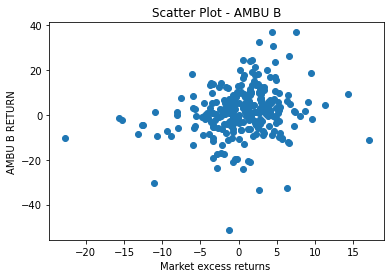

Regression summary for AMBU B:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     12.95
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           0.000381
Time:                        02:31:42   Log-Likelihood:                -1033.3
No. Observations:                 273   AIC:                             2071.
Df Residuals:                     271   BIC:                             2078.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1937

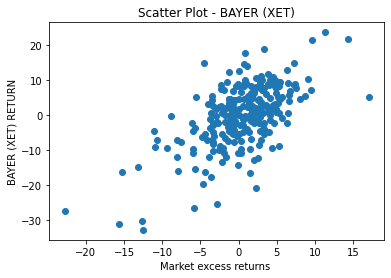

Regression summary for BAYER (XET):
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     165.8
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           6.29e-30
Time:                        02:31:43   Log-Likelihood:                -908.99
No. Observations:                 273   AIC:                             1822.
Df Residuals:                     271   BIC:                             1829.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0

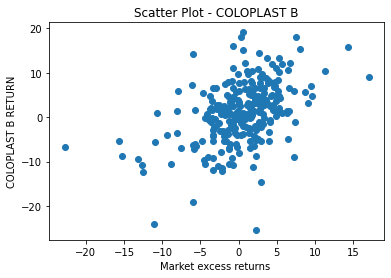

Regression summary for COLOPLAST B:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     70.60
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           2.49e-15
Time:                        02:31:43   Log-Likelihood:                -876.25
No. Observations:                 273   AIC:                             1757.
Df Residuals:                     271   BIC:                             1764.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0

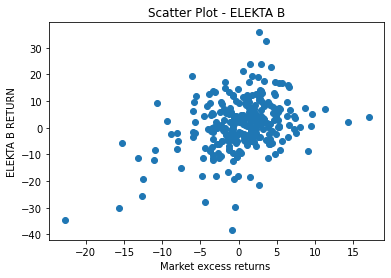

Regression summary for ELEKTA B:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     42.52
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           3.41e-10
Time:                        02:31:43   Log-Likelihood:                -995.74
No. Observations:                 273   AIC:                             1995.
Df Residuals:                     271   BIC:                             2003.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.98

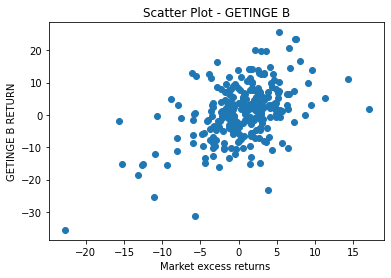

Regression summary for GETINGE B:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     77.63
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           1.52e-16
Time:                        02:31:44   Log-Likelihood:                -942.16
No. Observations:                 273   AIC:                             1888.
Df Residuals:                     271   BIC:                             1896.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4

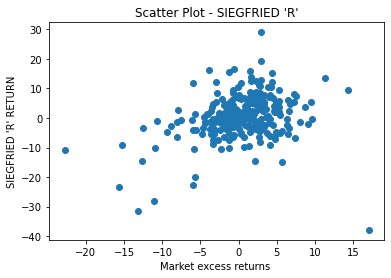

Regression summary for SIEGFRIED 'R':
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     26.99
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           4.03e-07
Time:                        02:31:44   Log-Likelihood:                -920.42
No. Observations:                 273   AIC:                             1845.
Df Residuals:                     271   BIC:                             1852.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         

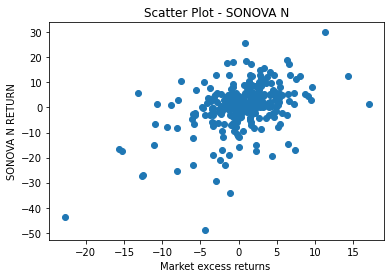

Regression summary for SONOVA N:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     70.00
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           3.18e-15
Time:                        02:31:45   Log-Likelihood:                -975.15
No. Observations:                 273   AIC:                             1954.
Df Residuals:                     271   BIC:                             1962.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.01

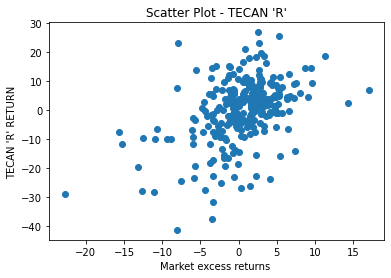

Regression summary for TECAN 'R':
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     68.68
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           5.41e-15
Time:                        02:31:45   Log-Likelihood:                -1011.7
No. Observations:                 273   AIC:                             2027.
Df Residuals:                     271   BIC:                             2035.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2

In [7]:
# Building a list with equity names to create a for loop later
df = pd.read_excel('23_equities.xlsx', header=None, index_col =None,na_values =['NA '])
company_names = df.iloc[0, 1:].tolist()
cleaned_company_names = [name.replace(' - TOT RETURN IND', '') for name in company_names]

for i in cleaned_company_names:
    # Arrays for the equity called in the loop
    EQT = data[[i + ' - TOT RETURN IND']]
    rEQT = 100 *(np.log(EQT)-np.log(EQT.shift(1)))
    rEQT=np.array(rEQT)
    rEQTe=np.subtract(rEQT,rF)
    # Scatter plot to visualise market equity vs market returns
    plt.scatter(rMKTe, rEQTe)
    plt.title(f'Scatter Plot - {i}')
    plt.xlabel('Market excess returns ')
    plt.ylabel( i + ' RETURN')
    plt.show()
    plt.close()
    # Performing the regression 
    print(f"Regression summary for {i}:")
    regression_summary = run_regression(rMKTe, rEQTe)


## POINT 3

Since the aim is to create a regression for the average excess returns through our sample, we create a dataframe with the excess returns to handle the following computations better. Theoretically, it's similar to the first lines in the for loop above for point 2.

In [8]:
equity_returns = data.iloc[: , 1:]  # Assuming 'Date' is the column with dates in the 'data' DataFrame

# Create a DataFrame for excess returns
excess_returns_df = pd.DataFrame(index=t)

# Calculate excess returns for each equity
for equity_column in equity_returns.columns:
    equity_returns_column = equity_returns[equity_column].values
    excess_returns = 100 * (np.log(equity_returns_column) - np.roll(np.log(equity_returns_column), 1)) - rF.flatten()
    excess_returns_df[f'Excess_{equity_column}'] = excess_returns


Obviously the first line of the substraction produces altered values because of the presence of Nan values, that make the first returns equal to the actual value of the stock. We need to exclude them to avoid non-sense results.

In [9]:
excess_returns_df_correct=excess_returns_df.iloc[1:,:]

In these lines we compute the sample mean for excess returns for each monthly return, by adding all the excess returns for the equities at time t, and dividing by the size of the sample, 23. We obtain a list "average_excess_returns" that we convert in an array to perform the regression on the average in the market.

In [10]:
# Sample mean of the returns for each monthly observations
average_excess_returns=[]
for row in range(len(excess_returns_df_correct)+1):
    sums= excess_returns_df_correct.iloc[row-1].sum()/23
    average_excess_returns.append(sums)

In [11]:
# Performing the regression on the average returns
rAex=np.array(average_excess_returns)
regression_summary = run_regression(rMKTe, rAex)
print(regression_summary)    
    


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     624.9
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           2.51e-72
Time:                        02:31:48   Log-Likelihood:                -654.76
No. Observations:                 273   AIC:                             1314.
Df Residuals:                     271   BIC:                             1321.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2600      0.162      1.600      0.1

Next, we create, as for the equities in point 2, a scatter plot that compares the average returns to market returns.

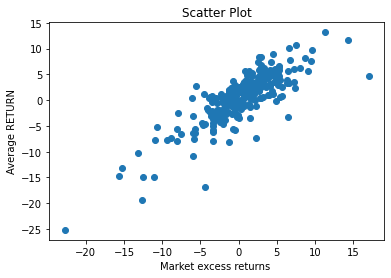

In [12]:
# Scatter plot market vs average sample
plt.scatter(rMKTe[1:], rAex[1:])
plt.title(f'Scatter Plot')
plt.xlabel('Market excess returns ')
plt.ylabel('Average RETURN')
plt.show()

Here we make the same comparison through plotting the evolution of the excess returns through time, to observe better the differences between the two

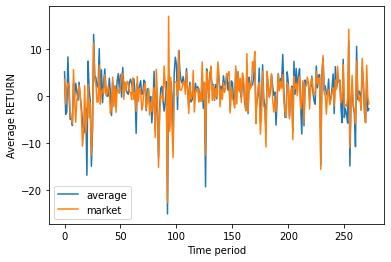

In [13]:
# Plot market vs average sample
plt.plot(rAex[1:], label="average")
plt.plot(rMKTe[1:], label="market")
plt.xlabel('Time period')
plt.ylabel('Average RETURN')
plt.legend()
plt.show()

## POINT 4 

Since the assignment asks to perform a battery of diagnostic tests, in order to have a shorter code we create a unique function "diagnostic_tests", which performs altogether the RESET, WHITE, and BREUSCH-GODFREY tests, otherwise the code would have become cumbersome.
In the function, the variables represents the arrays that are subject to the regression estimation. Note that for x, which should be the market vector we eliminate the first value, which is the Nan value, while for y, which will be the equity arrays, the first element has already been deleted before.
First we run the basic regression, because we need it to build the statistic for each test. 
For the reset test, we create the auxiliary regression including higher powers of the returns, because the test aims to check if the linear terms are enough to describe the model. Then we build the statistic Fstat as studied in class, choosing k=4 because we run the regressions with 4 variables (alpha, linear beta, square-beta, cube-beta). After the evaluation of the F-statistic, we compute the p-value, which will be stored in the lists of the following cell.
Next, we build the White test using the tools imported from the first cell, extracting the p-value once again stored later.
Finally, we perform the Breusch-Godfrey test with a similar procedure and the p-value is stored.



In [14]:
#diagnostic tests
def diagnostic_tests(x,y): 
    X = np.column_stack((np.ones_like(x[1:]),x[1:]))
    Res1 = sm.OLS(y,X).fit()
    Res1.summary()
    fit1 = Res1.fittedvalues
    # Reset test
    # Auxiliary regression
    X = np.column_stack((np.ones_like(x[1:]),x[1:],np.power(fit1,2),np.power(fit1,3)))
    Res2 = sm.OLS(y,X).fit()
    # test
    RSSR = Res1.ssr
    RSSU = Res2.ssr
    Fstat =((RSSR - RSSU)/2)/(RSSU /(269))
    Pval = 1 - sp.stats.f.cdf(Fstat ,2 ,269)
    list_reset.append(Pval) # store the p-value
    #White test
    rs = Res1.resid  
    whitetest =sm.stats.diagnostic.het_white(rs,X)
    list_white.append(whitetest[1]) # store the p-value
    #Breusch-Godfrey test
    bgtest =sm.stats.diagnostic.acorr_breusch_godfrey(Res1,nlags=3)    
    list_bgtest.append(bgtest[1]) # store the p-value


Here we create the three list that will contain the p-values for each test for each company. In fact, in the for loop we perform the "diagnostic_tests" function, which stores those values for each equity in the corresponding list.

In [15]:
list_reset=[]
list_white=[]
list_bgtest=[]
# for loop that performs the test on the equities
for i in cleaned_company_names:
    rEQTe = excess_returns_df_correct[["Excess_"+i + ' - TOT RETURN IND']]
    diagnostic_tests(rMKTe,rEQTe)


This cell is uset to round each value derived to the sixth decimal in order to visualize better the p-values, because a lot of them were given in exponential form.

In [16]:
list_reset=[round(x,6) for x in list_reset]
list_white=[round(x,6) for x in list_white]
list_bgtest=[round(x,6) for x in list_bgtest]

Creation of a resumé that shows the rounded p-values for the test.

In [17]:
# creating the table
sum_up_table = pd.DataFrame({"EQUITY": cleaned_company_names,"RESET TEST": list_reset,"WHITE TEST":list_white, "BREUSCH-GODFREY TEST":list_bgtest})
sum_up_table



,EQUITY,RESET TEST,WHITE TEST,BREUSCH-GODFREY TEST
0,ASTRAZENECA,0.149554,0.275140,0.045500
1,GLAXOSMITHKLINE,0.256735,0.005828,0.998885
2,NOVARTIS 'R',0.361361,0.213499,0.568235
3,NOVO NORDISK 'B',0.259226,0.841491,0.795805
4,ROCHE HOLDING,0.878588,0.885574,0.251860
5,SANOFI,0.016909,0.001232,0.125948
6,ESSILORLUXOTTICA,0.087340,0.774549,0.052395
7,DEMANT,0.138941,0.009604,0.359221
8,GN STORE NORD,0.000152,0.000000,0.918019
9,ORION B,0.832104,0.229090,0.607440


In presence of heteroskedasticity or serial correlation, which means that we reject the null hypothesis in White or Breusch-Godfrey tests, we can derive a better estimate by performing the regression using robust standard errors to absorb those effects.
Here we create the for loop to run the new regression. We need to define an if selection because we have to run the regression just for the equities characterised by heteroskedasticity or serial correlation or both. If at least one of the p-values is lower than 0.05 we enter the following codes, otherwise we switch to the following company.
If we enter, the array with the holding's return is created and the following lines are the ones creating the regression with HAC errors.

In [18]:
# for loop for the new regression
for i in cleaned_company_names:
    # evaluation of the p-values to see if the company is subject to the new analysis
    if list_white[cleaned_company_names.index(i)] <= 0.05 or list_bgtest[cleaned_company_names.index(i)]<=0.05: 
        rEQTe = excess_returns_df_correct[["Excess_"+i + ' - TOT RETURN IND']]
        X = np.column_stack((np.ones_like(rMKTe[1:]),rMKTe[1:]))
        #Regression with robust errors
        Res2 = sm.OLS(rEQTe,X).fit(cov_type='HAC',cov_kwds={'maxlags':1})
        Res2.summary()
        Res3 = sm.OLS(rEQTe,X).fit()
        Res4 = Res3.get_robustcov_results(cov_type='HAC',maxlags=1)
        print(f"Regression summary for {i}:") 
        print(Res4.summary())

Regression summary for ASTRAZENECA:
                                     OLS Regression Results                                    
Dep. Variable:     Excess_ASTRAZENECA - TOT RETURN IND   R-squared:                       0.491
Model:                                             OLS   Adj. R-squared:                  0.489
Method:                                  Least Squares   F-statistic:                     229.3
Date:                                 Mon, 11 Dec 2023   Prob (F-statistic):           5.95e-38
Time:                                         02:32:05   Log-Likelihood:                -825.36
No. Observations:                                  273   AIC:                             1655.
Df Residuals:                                      271   BIC:                             1662.
Df Model:                                            1                                         
Covariance Type:                                   HAC                                         
    

                                    OLS Regression Results                                   
Dep. Variable:     Excess_GETINGE B - TOT RETURN IND   R-squared:                       0.223
Model:                                           OLS   Adj. R-squared:                  0.220
Method:                                Least Squares   F-statistic:                     61.77
Date:                               Mon, 11 Dec 2023   Prob (F-statistic):           9.15e-14
Time:                                       02:32:05   Log-Likelihood:                -942.16
No. Observations:                                273   AIC:                             1888.
Df Residuals:                                    271   BIC:                             1896.
Df Model:                                          1                                         
Covariance Type:                                 HAC                                         
                 coef    std err          t      P>|t|      

## POINT 5

In this section we import new variables from the Kenneth-French website, to see if they influence the evolution of the index.
Firstly, we import the variables' data from the excel file, including the market excess returns used before.
Then, we run the regression adding these variables and we observe that only some of them are significative for the model; therefore the new regression will contain only those variables (F1,F4,F6) to have the new fit model.
Finally, we compute the p-value for the new fit model.

In [22]:

FFvariables = pd.read_excel('FFvariables.xlsx', 'Foglio1', index_col =None, na_values =['NA '])

# load data of one worksheet
F1= FFvariables[["Mkt-RF"]]
F2= FFvariables.SMB
F3= FFvariables.HML
F4= FFvariables.RMW
F5= FFvariables.CMA
F6= rMKTe[1:274]

#Here we will use the method of the OLS to create two different models
Y=rAex[1:]
# First model with all variables
X =np.column_stack((np.ones_like(F1) , F1 , F2 , F3 , F4 , F5 , F6) )
Res_tot = sm.OLS(Y , X).fit()
print(f"New model:")
print(Res_tot.summary())
# Model with only significative values
X = np.column_stack((np.ones_like(F1) ,F1, F4, F6))
Res_sel = sm.OLS(Y , X).fit()
print(f"Model just with significative variables:")
print(Res_sel.summary())
# Computing the p-value
RSSU = Res_tot.ssr
RSSR = Res_sel.ssr
Fstat =(( RSSR - RSSU ) /8) /( RSSU /(264) )
Pval =1 - sp.stats.f.cdf(Fstat ,8,264)
print(f"p-value={Pval}")

New model:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     150.3
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           1.89e-82
Time:                        02:42:05   Log-Likelihood:                -616.02
No. Observations:                 273   AIC:                             1246.
Df Residuals:                     266   BIC:                             1271.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1722      0.150      1.1

Next, we compute the returns for the factor of Kenneth-French compared to the average market returns.

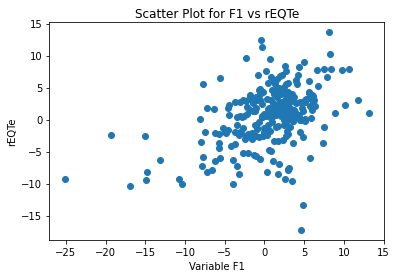

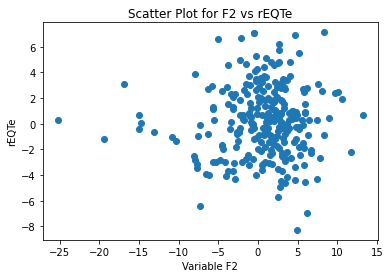

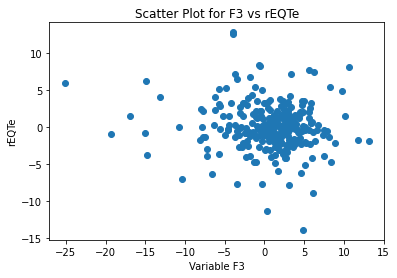

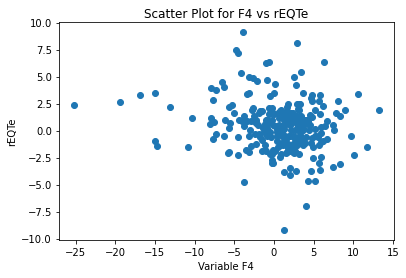

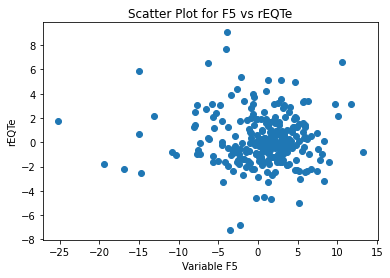

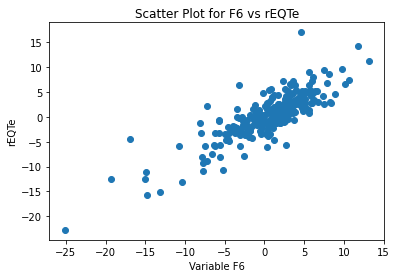

In [21]:
# Scatter plot for the variables of Kenneth-French
list_scatter= [F1,F2,F3,F4,F5,F6]
for i, element in enumerate(list_scatter):
    plt.scatter(rAex[1:],element)
    plt.title(f'Scatter Plot for F{i+1} vs rEQTe')
    plt.xlabel(f'Variable F{i+1}')
    plt.ylabel("rEQTe")
    plt.show()

Here we plot an histogram which shows the distribution of the average market residuals obtained with the regression model, to verify the presence of outliers.

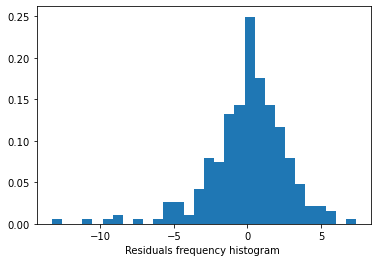

In [26]:
# Residuals plot
X =np.column_stack((np.ones_like(rMKTe[1:]), rMKTe[1:]))
Res1 = sm.OLS(rAex[1:],X).fit()
rs1 = Res1.resid
# frequency histogram
plt.hist(rs1, bins=30 , density = True )
plt.xlabel('Residuals frequency histogram ')
plt.show()

The same procedure is repeated on the fit model obtained by adding the three significative variables to compare it to the market.

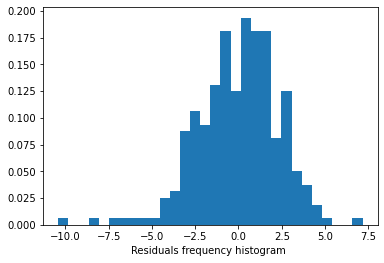

In [27]:
# Residuals plot
X =np.column_stack((np.ones_like(F1),F1,F4,F6))
Res2 = sm.OLS(rAex[1:], X).fit()
rs2 = Res2.resid
# frequency histogram
plt.hist(rs2, bins=30 , density = True )
plt.xlabel('Residuals frequency histogram ')
plt.show()

Next, we build a plot to compare the same residuals we observed with the histograms, but we observe the evolution through time of those ones. In addition we compute the correlation between the residuals to check how they're evolving in a similar way

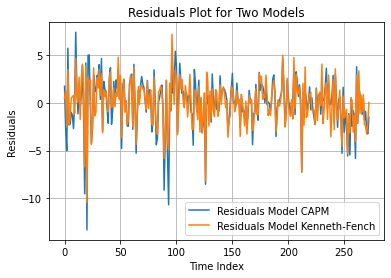

Correlation: 0.8779569761926764


In [28]:
# Plot residuals as lines
plt.plot(rs1, label='Residuals Model CAPM')
plt.plot(rs2, label='Residuals Model Kenneth-Fench')
plt.title('Residuals Plot for Two Models')
plt.xlabel('Time Index')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.show()
# Compute the correlation between residuals
correlation_res = np.corrcoef(rs1, rs2)[0, 1]
print(f"Correlation: {correlation_res}")

The final observation we want to make is the correlation of the residuals through time of the residuals in the two different models: average and fit. The following lines of code build the vectors of the correlation for the models, then we show them in a unique plot to see how they evolve and to compare them.
The for loop built in the last section of the sell is built to exclude the outliers created by the method, otherwise in the midpoint we would obtain outliers.

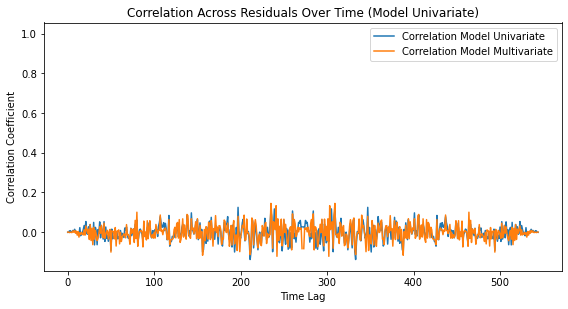

In [29]:
# Calculate the correlation coefficients at each time point for each model
correlation_across_time_model1 = np.correlate(rs1, rs1, mode='full')
correlation_across_time_model2 = np.correlate(rs2, rs2, mode='full')

# Exclude a small neighborhood around the central peak by setting it to NaN

# Normalize the correlation coefficients, excluding NaN values
normalized_correlation_model1 = correlation_across_time_model1 / np.nanmax(np.abs(correlation_across_time_model1))
normalized_correlation_model2 = correlation_across_time_model2 / np.nanmax(np.abs(correlation_across_time_model2))

# Visualize the correlation across residuals over time for each model
plt.figure(figsize=(8, 8))

# Plot correlation across residuals over time for Model 1
plt.subplot(2, 1, 2)
plt.plot(normalized_correlation_model1, label='Correlation Model Univariate')
plt.plot(np.arange(len(normalized_correlation_model2)), normalized_correlation_model2, label='Correlation Model Multivariate')
plt.title('Correlation Across Residuals Over Time (Model Univariate)')
plt.xlabel('Time Lag')
plt.ylabel('Correlation Coefficient')
plt.legend()

#In the midpoint it creates outliers due to its construction, so it was added this for loop that eliminate outliers from the 
#central point of the graph
for ax in plt.gcf().get_axes():
    for line in ax.get_lines():
        y_data = line.get_ydata()
        x_data = line.get_xdata()
        line.set_ydata(np.where(y_data > 0.3, np.nan, y_data))

plt.tight_layout()
plt.show()

## POINT 6

In this point we need to perform the Chow test. We decide to build a function because we will need to perform the test iteratively on the equities.
The variables x,y represents the vectors for the regression, while m is the date in which we divide the two subset of datas; we will choose m=27 because it corresponds to the 10% of the sample size. 
In the function we build the regression for the two subsets, than we recover the needed parameters to built the test statistic for the Chow test and compute the p-value, which will be the output returned by the function. Note that the difference in dividing the lists with the data is done always because rEQTe and rMKt have different lengths.
In the for loop, we perform the Chow test for each equity and return tha p-values to evaluate it.

In [30]:
# chow test identifies potential break date 
def chow_test(x,y,m):     
    X1 = np.column_stack((np.ones_like(x[1:m]),x[1:m]))
    X2 = np.column_stack((np.ones_like(x[m+1:]),x[m+1:]))
    Res2a = sm.OLS(y[:m-1],X1).fit()
    Res2b = sm.OLS(y[m:],X2).fit()
    X = np.column_stack((np.ones_like(x[1:] ),x[1:]))
    Res1 = sm.OLS(y,X).fit()
    # Recover RSS
    RSSU = Res2a.ssr + Res2b.ssr
    RSSR = Res1.ssr
    # Build test
    Fstat =((RSSR - RSSU)/2)/(RSSU/(269))
    Pval =1-sp.stats.f.cdf(Fstat ,2 ,269)
    return Pval

# for loop for the Chow tests
for i in cleaned_company_names:
    rEQTe = excess_returns_df_correct[["Excess_"+ i + ' - TOT RETURN IND']]
    print(chow_test(rMKTe,rEQTe,27))
    
 

0.8799556311745724
0.36783178484400947
0.062205679140180936
0.23824931462891952
0.2690126919856579
0.27339830147594024
0.03190828881732144
0.27306409774477935
0.06647782313054273
0.10277224294009046
0.0677325967798158
0.0020341899384409556
0.10799973859260359
0.11340933265498154
0.11925309781796667
0.2579406212768337
0.019558375573855202
0.3147888088299402
0.0031993866299748763
0.1011817002518125
0.3300291113592553
0.00025372317160876623
0.04927564007679397


Here we define a new function which performs the Chow test by looping across break dates, which means that we shift the division of the subsets each time to detect which are the possible break dates.
Once again, we choose m=27, and in the function we shift the value from 27 to 274-27 by one each time, obtaining different subsets each time, on which we perform the Chow test by recalling the function in the previous cell. Each repetition of the Chow test provide a p-value which is stored in a list, that is going to be needed in the next lines to build a plot in which we observe the evolution of the p-values through the windows.
After the function, we run the for loop in which the loop across break dates is performed on all the equities, providing a graph each.

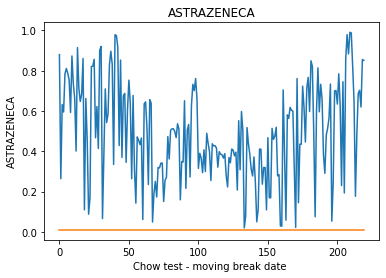

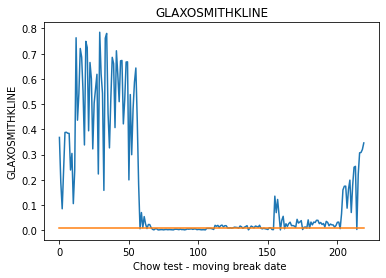

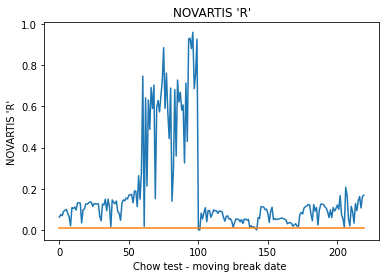

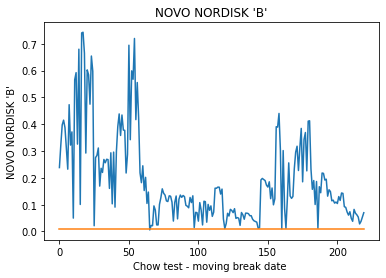

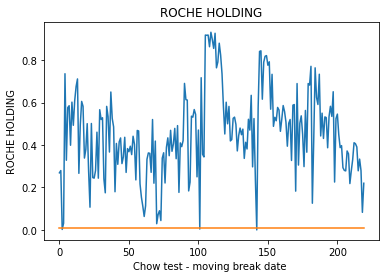

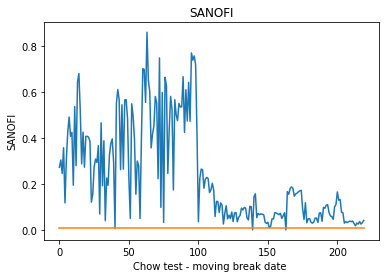

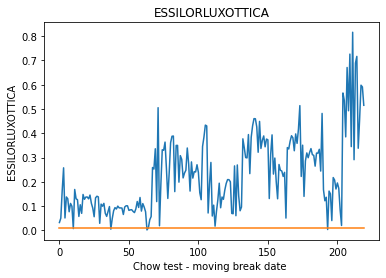

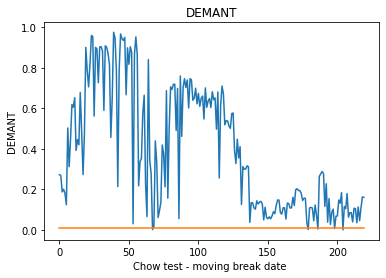

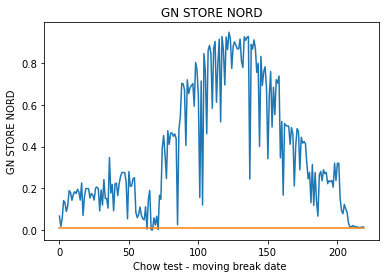

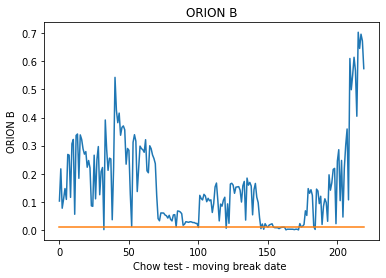

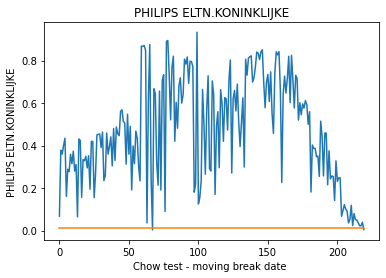

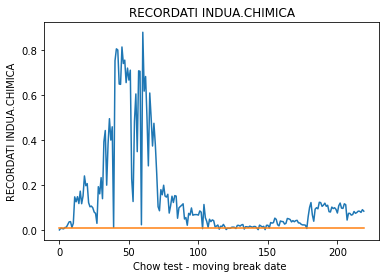

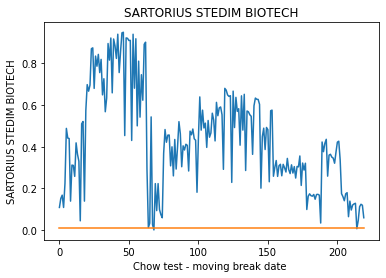

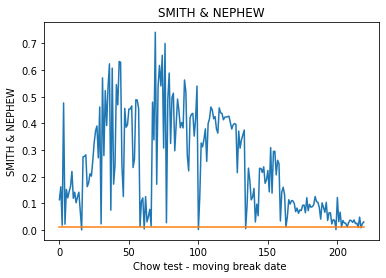

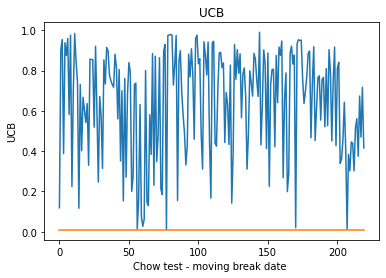

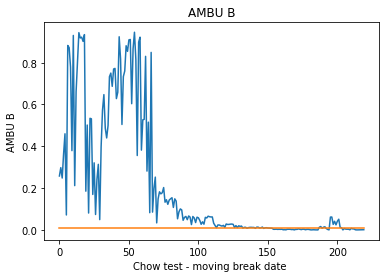

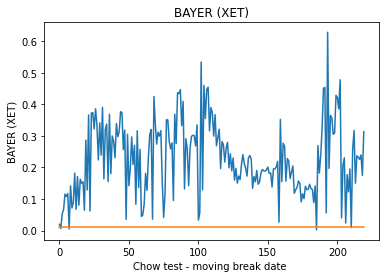

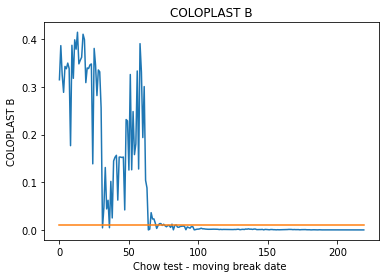

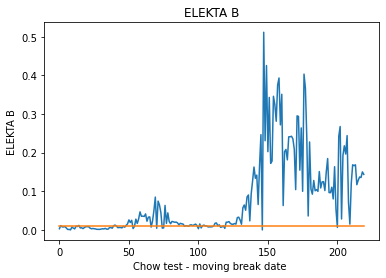

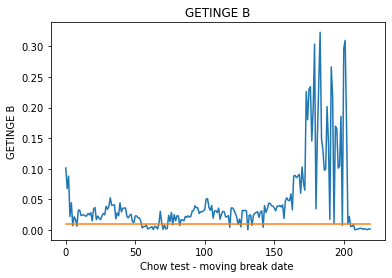

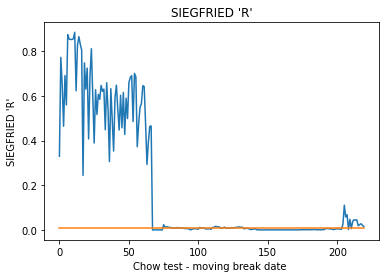

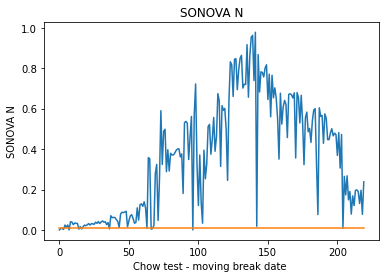

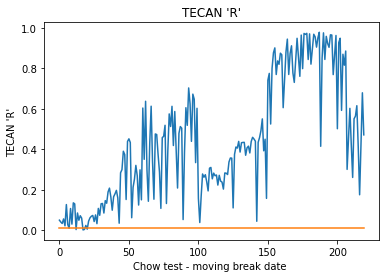

In [25]:
# looping across break dates

def rolling_chow_test(x,y,m):
    X = np.column_stack((np.ones_like(x[1:]),x[1:]))
    Res1 = sm.OLS(y,X).fit()
    RSSR = Res1.ssr
    i1=m
    i2=274- m  
    Pval=[]
    for ii in range(i1,i2):
        s=chow_test(rMKTe,rEQTe,ii)
        Pval.append(s)
    plt.plot(Pval)
    plt.plot(0.01*np.ones_like(Pval))
    plt.xlabel('Chow test - moving break date ')
    plt.ylabel('{}'.format(i))
    plt.title('{}'.format(i))
    plt.show()
    plt.close()

for i in cleaned_company_names:
    rEQTe = excess_returns_df_correct[["Excess_"+ i + ' - TOT RETURN IND']]
    rolling_chow_test(rMKTe,rEQTe,27)

## POINT 7


We aim to perform the CAPM estimation on 5-years periods as an alternative to the Chow test.
In order to do that, we need to construct two function to store the parameters and shift the regression on each period.

The first function returns the parameters of the regression performed: in particular we collect alphas and betas with their upper and lower estimates for the confidence intervals, plus the value r-squared. The extraction of the confidence intervals is a little complex because they are given in a matrix form. The function returns a list with all the parameters, in order to access it later.

The second function is built to perform the rolling window approach: a while loop is built to shift the 5-years period until we reach the final index, starting from two initial parameters t1 and t2 that create the subset of data of 5 years. Then, in the while loop we use the previous function to extract the parameters which are going to be stored in the respective lists. The function returns a list of the lists of the evolution of parameters through the time windows.

In [31]:
def run_regression_parameters(x, y):
    X = np.column_stack((np.ones_like(x[1:]), x[1:]))
    Res = sm.OLS(y[1:], X).fit()
    # Extracting the parameters
    alpha=Res.params[0]
    beta=Res.params[1]
    r_sq=Res.rsquared
    conf=Res.conf_int()
    # Searching each value of the confidence intervals
    lower = conf[[0]]
    upper= conf[[1]]
    alpha_lower=lower.flat[0]
    alpha_upper=lower.flat[1]
    beta_lower=upper.flat[0]
    beta_upper=upper.flat[1]
    # list output with the parameters
    p=[alpha,beta,r_sq,alpha_lower,alpha_upper,beta_lower,beta_upper]
    return p
    
    

def rolling_window():
    # time variables
    t1=1
    t2=61
    # empty lists to store the parameters
    alphas=[]
    betas=[]
    r_squared=[]   
    alpha_low=[]
    alpha_up=[]
    beta_low=[]
    beta_up=[]
    # while loop when the time variables make sense
    while t1<214 and t2<274: 
        # extracting the parameters
        param=run_regression_parameters(rMKT[t1:t2],rEQTe[t1:t2]) 
        # each paramter goes to the respective list
        alphas.append(param[0])
        betas.append(param[1])
        r_squared.append(param[2])
        alpha_low.append(param[3])
        alpha_up.append(param[4])
        beta_low.append(param[5])
        beta_up.append(param[6])
        # Shifting the window
        t1+=1
        t2+=1
    # list output with the lists containing the evolution of parameters    
    l=[alphas,betas,r_squared,alpha_low,alpha_up,beta_low,beta_up]
    return l
   
    


For each equity we perform the rolling window approach with a for loop, in which we built a graph for alphas and beta with their confidence intervals, and the value r-squared to check the fitness of the model.

Evolution of alphas for ASTRAZENECA


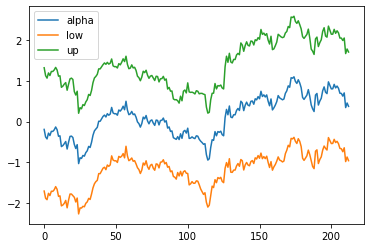

Evolution betas for ASTRAZENECA


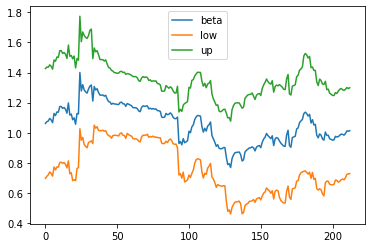

Evolution r-squared for ASTRAZENECA


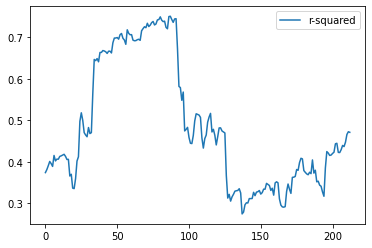

Evolution of alphas for GLAXOSMITHKLINE


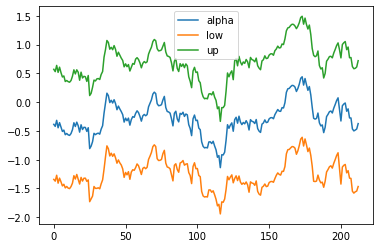

Evolution betas for GLAXOSMITHKLINE


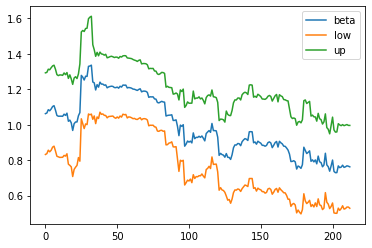

Evolution r-squared for GLAXOSMITHKLINE


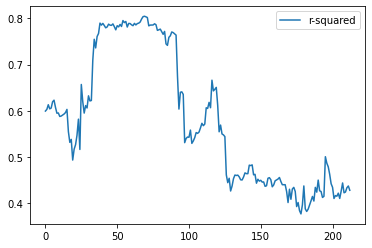

Evolution of alphas for NOVARTIS 'R'


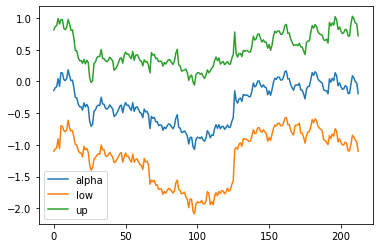

Evolution betas for NOVARTIS 'R'


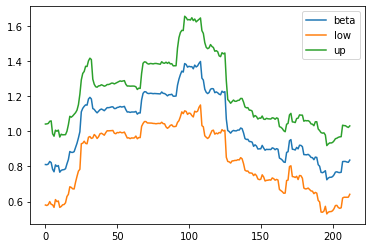

Evolution r-squared for NOVARTIS 'R'


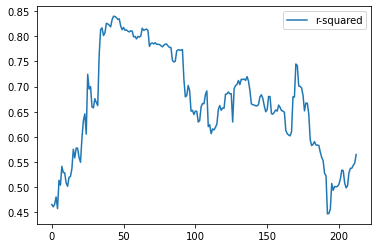

Evolution of alphas for NOVO NORDISK 'B'


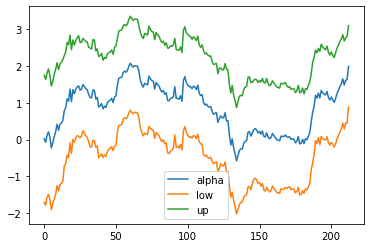

Evolution betas for NOVO NORDISK 'B'


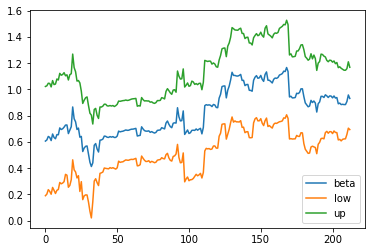

Evolution r-squared for NOVO NORDISK 'B'


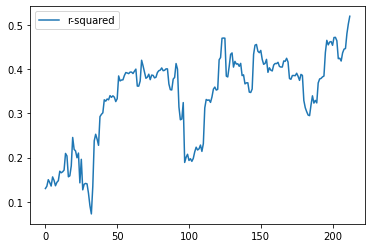

Evolution of alphas for ROCHE HOLDING


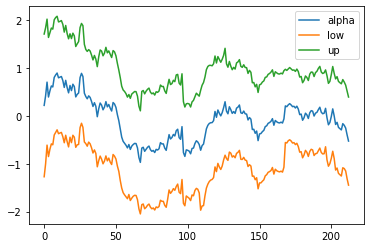

Evolution betas for ROCHE HOLDING


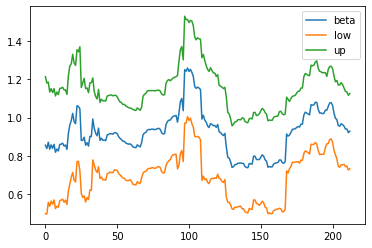

Evolution r-squared for ROCHE HOLDING


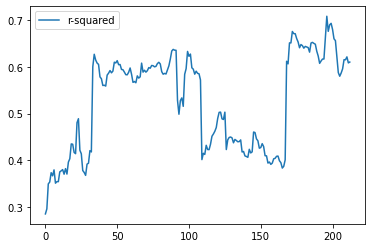

Evolution of alphas for SANOFI


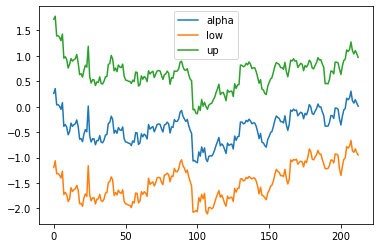

Evolution betas for SANOFI


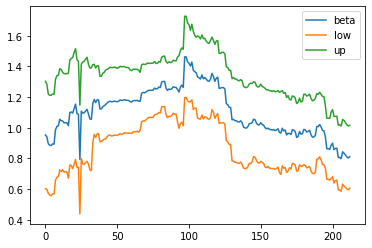

Evolution r-squared for SANOFI


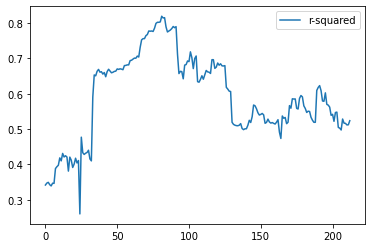

Evolution of alphas for ESSILORLUXOTTICA


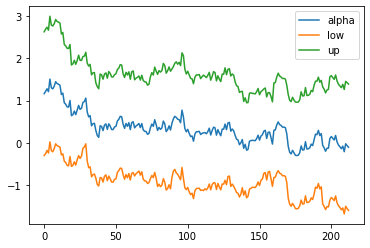

Evolution betas for ESSILORLUXOTTICA


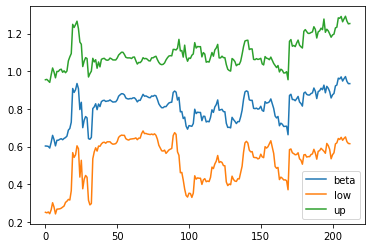

Evolution r-squared for ESSILORLUXOTTICA


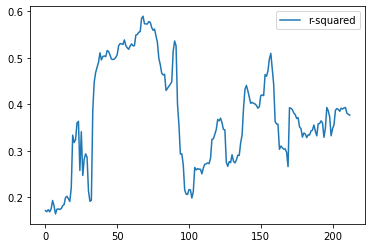

Evolution of alphas for DEMANT


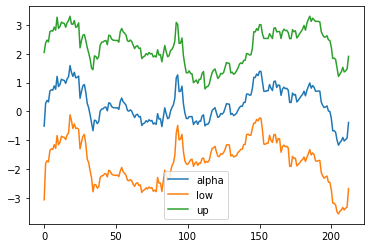

Evolution betas for DEMANT


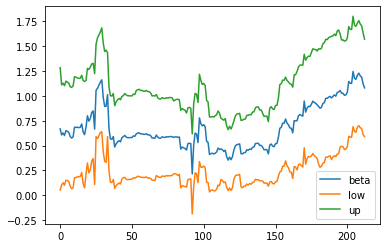

Evolution r-squared for DEMANT


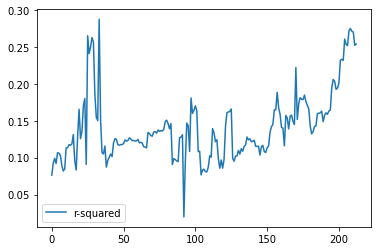

Evolution of alphas for GN STORE NORD


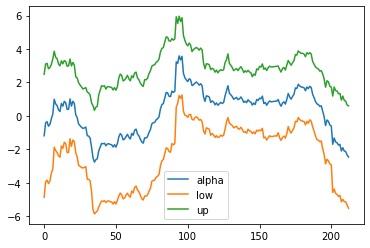

Evolution betas for GN STORE NORD


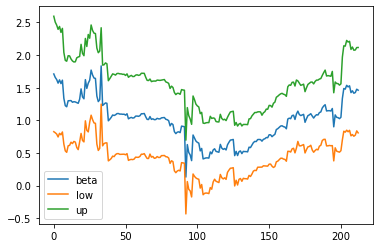

Evolution r-squared for GN STORE NORD


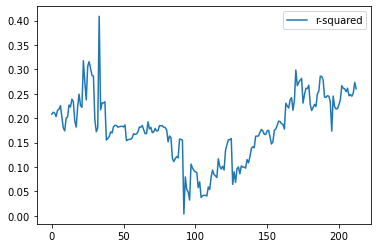

Evolution of alphas for ORION B


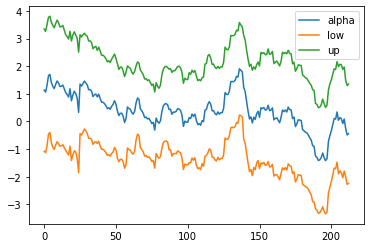

Evolution betas for ORION B


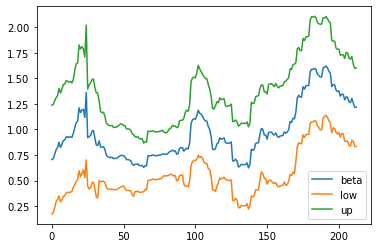

Evolution r-squared for ORION B


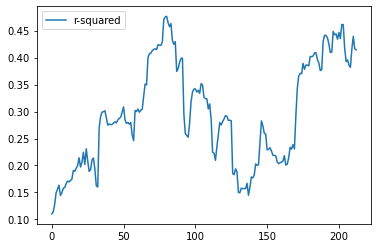

Evolution of alphas for PHILIPS ELTN.KONINKLIJKE


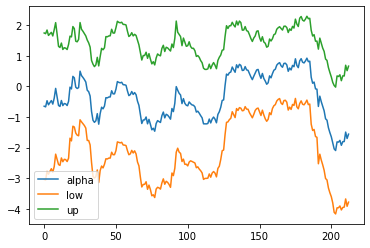

Evolution betas for PHILIPS ELTN.KONINKLIJKE


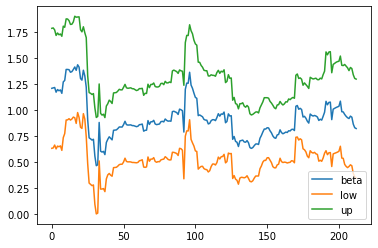

Evolution r-squared for PHILIPS ELTN.KONINKLIJKE


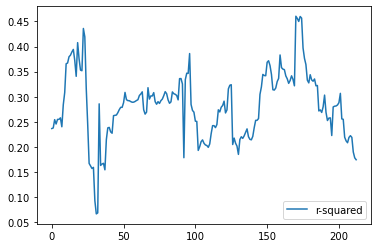

Evolution of alphas for RECORDATI INDUA.CHIMICA


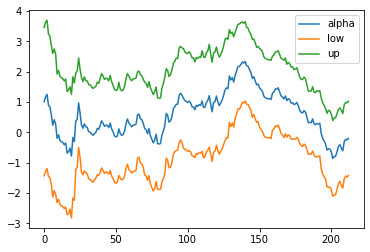

Evolution betas for RECORDATI INDUA.CHIMICA


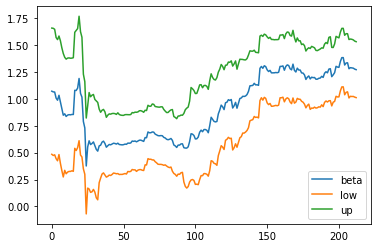

Evolution r-squared for RECORDATI INDUA.CHIMICA


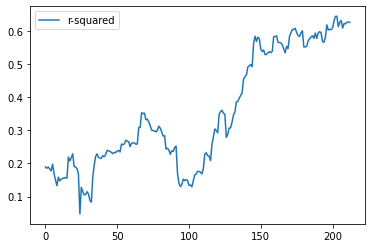

Evolution of alphas for SARTORIUS STEDIM BIOTECH


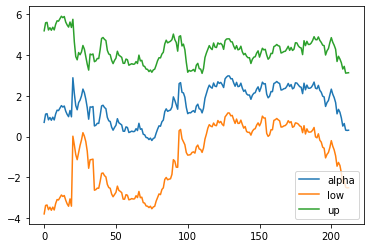

Evolution betas for SARTORIUS STEDIM BIOTECH


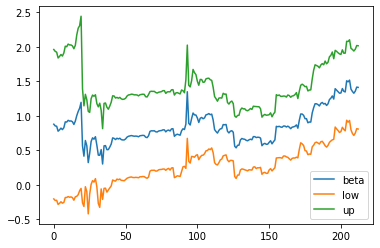

Evolution r-squared for SARTORIUS STEDIM BIOTECH


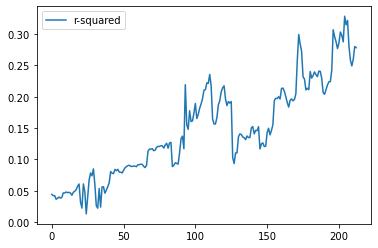

Evolution of alphas for SMITH & NEPHEW


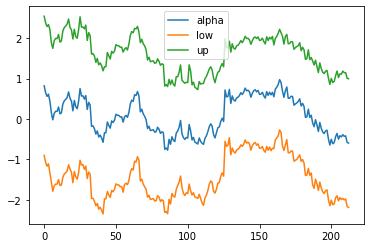

Evolution betas for SMITH & NEPHEW


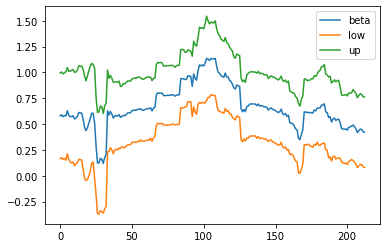

Evolution r-squared for SMITH & NEPHEW


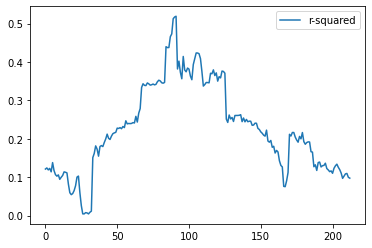

Evolution of alphas for UCB


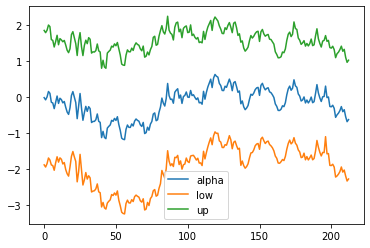

Evolution betas for UCB


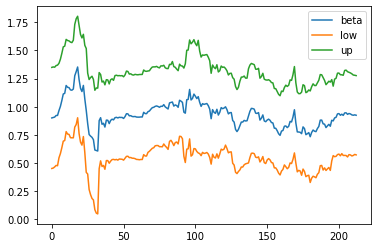

Evolution r-squared for UCB


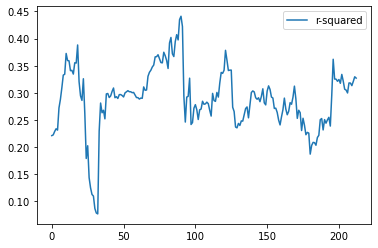

Evolution of alphas for AMBU B


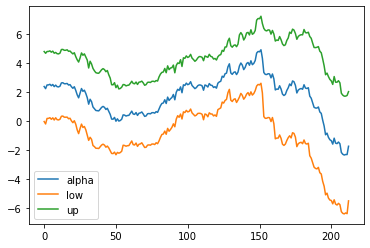

Evolution betas for AMBU B


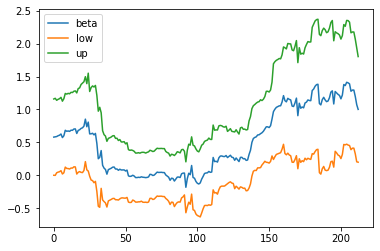

Evolution r-squared for AMBU B


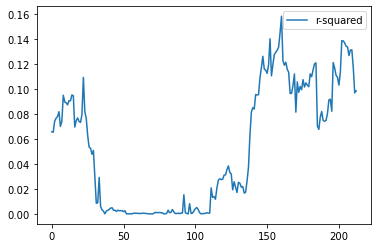

Evolution of alphas for BAYER (XET)


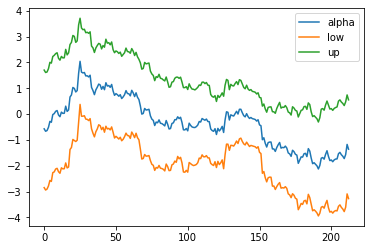

Evolution betas for BAYER (XET)


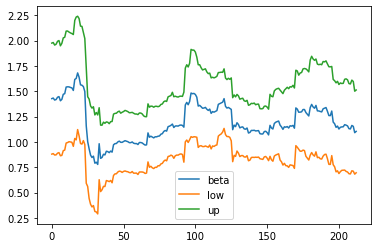

Evolution r-squared for BAYER (XET)


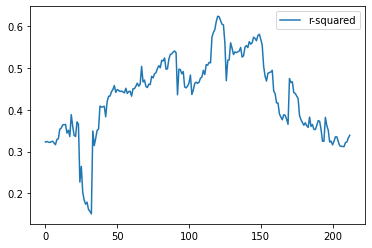

Evolution of alphas for COLOPLAST B


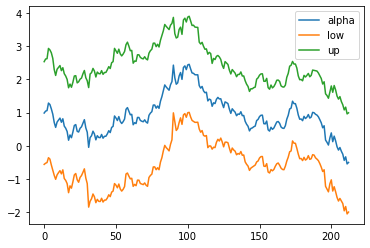

Evolution betas for COLOPLAST B


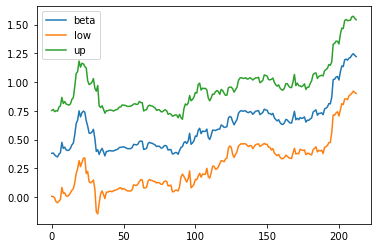

Evolution r-squared for COLOPLAST B


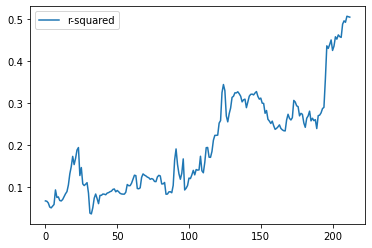

Evolution of alphas for ELEKTA B


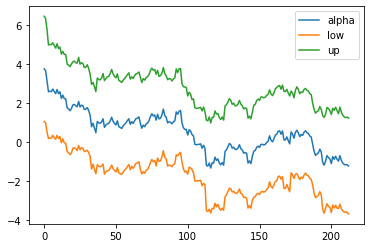

Evolution betas for ELEKTA B


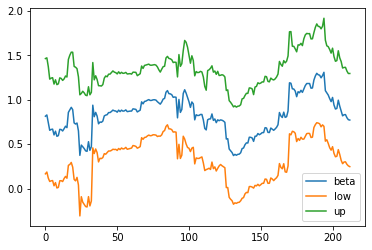

Evolution r-squared for ELEKTA B


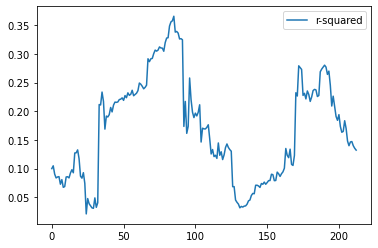

Evolution of alphas for GETINGE B


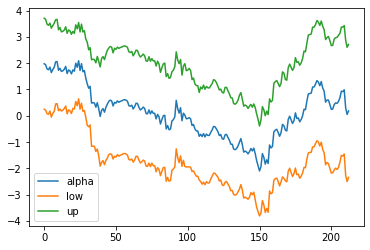

Evolution betas for GETINGE B


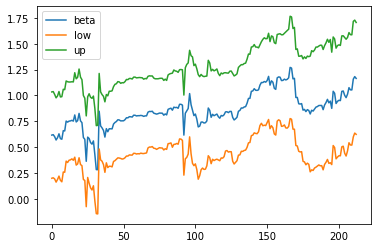

Evolution r-squared for GETINGE B


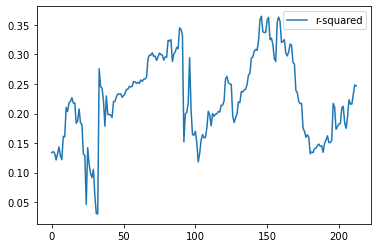

Evolution of alphas for SIEGFRIED 'R'


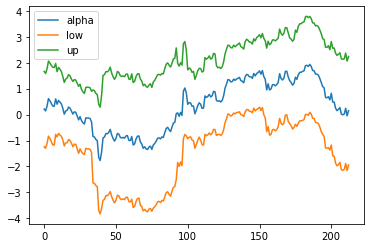

Evolution betas for SIEGFRIED 'R'


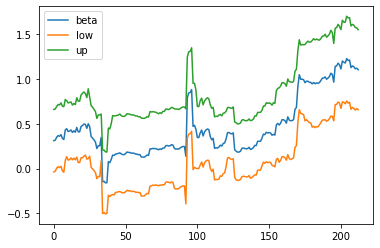

Evolution r-squared for SIEGFRIED 'R'


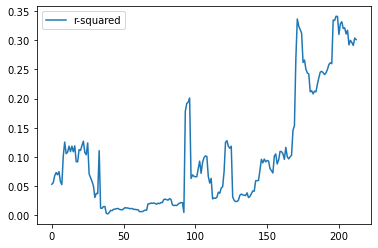

Evolution of alphas for SONOVA N


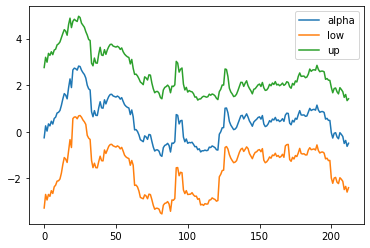

Evolution betas for SONOVA N


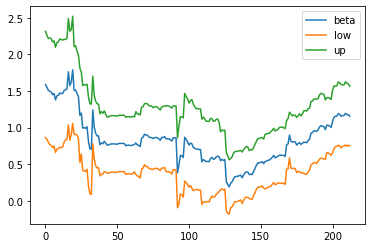

Evolution r-squared for SONOVA N


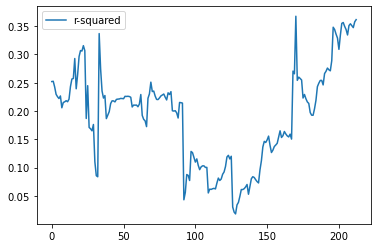

Evolution of alphas for TECAN 'R'


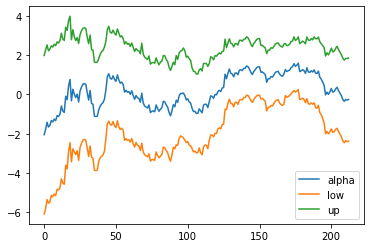

Evolution betas for TECAN 'R'


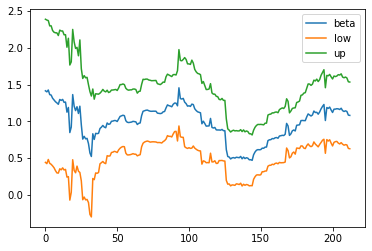

Evolution r-squared for TECAN 'R'


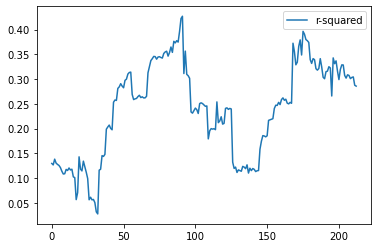

In [33]:
for i in cleaned_company_names:
    EQT = data[[i + ' - TOT RETURN IND']]
    rEQT = 100 *(np.log(EQT)-np.log(EQT.shift(1)))
    rEQT=np.array(rEQT)
    rEQTe=np.subtract(rEQT,rF)
    # Rolling window approach collects the parameters
    study=rolling_window()
    # Plot for alphas    
    print(f"Evolution of alphas for {i}")
    plt.plot(study[0],label="alpha")
    plt.plot(study[3],label="low")
    plt.plot(study[4],label="up")
    plt.legend()
    plt.show()
    plt.close()
    # Plot for betas
    print(f"Evolution betas for {i}")
    plt.plot(study[1],label="beta")
    plt.plot(study[5],label="low")
    plt.plot(study[6],label="up")
    plt.legend()
    plt.show()
    plt.close()
    # Plot for r-squared
    print(f"Evolution r-squared for {i}")
    plt.plot(study[2],label="r-squared")
    plt.legend()
    plt.show()
    plt.close()